<center><h1> Problem2 - CNN on MNIST </h1><center>

### Import the required packages

In [31]:
import tensorflow as tf

#To check if tensorflow can access the gpu
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

Found GPU at: /device:GPU:0


### Load MNIST Data

In [32]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


### Check the train-valid-test data size

In [33]:
print("Num of samples-Train: {}".format(len(data.train.labels)))
print("Num of samples-Test: {}".format(len(data.test.labels)))
print("Num of samples-Valid: {}".format(len(data.validation.labels)))

Num of samples-Train: 55000
Num of samples-Test: 10000
Num of samples-Valid: 5000


### Initalization of the placeholder variables

In [0]:
x = tf.placeholder(tf.float32, shape=[None, 28*28], name='X')
x_image = tf.reshape(x, [-1, 28, 28, 1])

y_true = tf.placeholder(tf.float32, shape=[None, 10], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

### Functions to create basic CNN layers

In [0]:
#Create convolution layer
def conv_layer(input, num_input_channels, filter_size, num_filters, name):
    
    #Filter-shape
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    # Weights and Biases
    weights = tf.Variable(tf.truncated_normal(shape, stddev=0.05))
    #weights = tf.Variable(tf.constant(0, shape))
    biases = tf.Variable(tf.constant(0.01, shape=[num_filters]))

    layer = tf.nn.conv2d(input=input, filter=weights, strides=[1, 1, 1, 1], padding='SAME')
    layer += biases

    return layer, weights

#Create pool layer      
def pool_layer(input, name):
    
    layer = tf.nn.max_pool(value=input, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    return layer

#Create ReLU Activation Layer
def relu_layer(input, name):

    layer = tf.nn.relu(input)

    return layer

#Create Fully Connected Layer
def fc_layer(input, num_inputs, num_outputs, name):
    
    weights = tf.Variable(tf.truncated_normal([num_inputs, num_outputs], stddev=0.05))
    biases = tf.Variable(tf.constant(0.01, shape=[num_outputs]))

    layer = tf.matmul(input, weights) + biases

    return layer

###  Convolutional Neural Network - Architecture for Classification - 4 Conv layers

In [36]:
'''
# Convolution 1
conv1, weights_conv1 = conv_layer(input=x_image, num_input_channels=1, filter_size=5, num_filters=8, name ="conv1")
pool1 = pool_layer(conv1, name="pool1")
relu1 = relu_layer(pool1, name="relu1")

# Convolution 2
conv2, weights_conv2 = conv_layer(input=relu1, num_input_channels=8, filter_size=5, num_filters=16, name= "conv2")
pool2 = pool_layer(conv2, name="pool2")
relu2 = relu_layer(pool2, name="relu2")

# Convolution 3
conv3, weights_conv3 = conv_layer(input=relu2, num_input_channels=16, filter_size=5, num_filters=32, name= "conv3")
pool3 = pool_layer(conv3, name="pool3")
relu3 = relu_layer(pool3, name="relu3")

# Convolution 4
conv4, weights_conv4 = conv_layer(input=relu3, num_input_channels=32, filter_size=5, num_filters=64, name= "conv4")
pool4 = pool_layer(conv4, name="pool4")
relu4 = relu_layer(pool4, name="relu4")

# Flatten Layer
num_features = relu4.get_shape()[1:4].num_elements()
flat = tf.reshape(relu4, [-1, num_features])

# Fully-Connected Layer 1
fc1 = fc_layer(flat, num_inputs=num_features, num_outputs=128, name="fc1")
relu5 = relu_layer(fc1, name="relu5")

# Fully-Connected Layer 2
fc2 = fc_layer(input=relu5, num_inputs=128, num_outputs=10, name="fc2")
'''


'\n# Convolution 1\nconv1, weights_conv1 = conv_layer(input=x_image, num_input_channels=1, filter_size=5, num_filters=8, name ="conv1")\npool1 = pool_layer(conv1, name="pool1")\nrelu1 = relu_layer(pool1, name="relu1")\n\n# Convolution 2\nconv2, weights_conv2 = conv_layer(input=relu1, num_input_channels=8, filter_size=5, num_filters=16, name= "conv2")\npool2 = pool_layer(conv2, name="pool2")\nrelu2 = relu_layer(pool2, name="relu2")\n\n# Convolution 3\nconv3, weights_conv3 = conv_layer(input=relu2, num_input_channels=16, filter_size=5, num_filters=32, name= "conv3")\npool3 = pool_layer(conv3, name="pool3")\nrelu3 = relu_layer(pool3, name="relu3")\n\n# Convolution 4\nconv4, weights_conv4 = conv_layer(input=relu3, num_input_channels=32, filter_size=5, num_filters=64, name= "conv4")\npool4 = pool_layer(conv4, name="pool4")\nrelu4 = relu_layer(pool4, name="relu4")\n\n# Flatten Layer\nnum_features = relu4.get_shape()[1:4].num_elements()\nflat = tf.reshape(relu4, [-1, num_features])\n\n# Fully

###Convolutional Neural Network - Architecture for Classification - 3 Conv layers

In [0]:
# Convolution 1
conv1, weights_conv1 = conv_layer(input=x_image, num_input_channels=1, filter_size=7, num_filters=8, name ="conv1")
pool1 = pool_layer(conv1, name="pool1")
relu1 = relu_layer(pool1, name="relu1")

# Convolution 2
conv2, weights_conv2 = conv_layer(input=relu1, num_input_channels=8, filter_size=7, num_filters=32, name= "conv2")
pool2 = pool_layer(conv2, name="pool2")
relu2 = relu_layer(pool2, name="relu2")

# Convolution 3
conv3, weights_conv3 = conv_layer(input=relu2, num_input_channels=32, filter_size=7, num_filters=64, name= "conv3")
pool3 = pool_layer(conv3, name="pool3")
relu3 = relu_layer(pool3, name="relu3")

# Flatten Layer
num_features = relu3.get_shape()[1:4].num_elements()
flat = tf.reshape(relu3, [-1, num_features])

# Fully-Connected Layer 1
fc1 = fc_layer(flat, num_inputs=num_features, num_outputs=128, name="fc1")
relu4 = relu_layer(fc1, name="relu4")

# Fully-Connected Layer 2
fc2 = fc_layer(input=relu4, num_inputs=128, num_outputs=10, name="fc2")

###  Parameter count in the 4 layer CNN(5x5 kernel)


  
  | Name                                        | size                                              |parameters                                              |
| ---------------------------------------------- |:-----------------------------------------------:| -----------------------------------------------------------:|
| 0  input      | 1x28x28 | 0 |
| 1  conv2d1     |  8x28x28       |   (5x5x1+1)*8   =     208 |
| 2  maxpool1 |  8x28x28       |    0 |
| 3  conv2d2     |  16x28x28       |    (5x5x8+1)x16  =   3216 |
| 4  maxpool2 |  16x28x28            |    0 |
| 5  conv2d3     |  32x28x28       |    (5x5x16+1)x32  =   12832 |
| 6  maxpool3 |  32x28x28            |    0 |
| 7  conv2d4     |  64x28x28       |    (5x5x32+1)x64  =   51264 |
| 8  maxpool4 |  64x28x28            |    0 |
|9  dense  |128   | (64x5x5+1)*128 = 204928 |
| 10  output |10 |(128+1)x10     =   1290 |

|Total number of learnable parameters in the CNN|Train Accuracy|Validation Accuracy|
|-------------------------------------------------------------------------------|------------------------|--------------------------------|
| 2,73,738|99.43 |97.89 |


###  Parameter count in the 4 layer CNN(7x7 kernel)


  
  | Name                                        | size                                              |parameters                                              |
| ---------------------------------------------- |:-----------------------------------------------:| -----------------------------------------------------------:|
| 0  input      | 1x28x28 | 0 |
| 1  conv2d1     |  8x28x28       |   (7x7x1+1)*8   =     400 |
| 2  maxpool1 |  8x28x28       |    0 |
| 3  conv2d2     |  16x28x28       |    (7x7x8+1)x16  =   6288 |
| 4  maxpool2 |  16x28x28            |    0 |
| 5  conv2d3     |  32x28x28       |    (7x7x16+1)x32  =   25120 |
| 6  maxpool3 |  32x28x28            |    0 |
| 7  conv2d4     |  64x28x28       |    (7x7x32+1)x64  =   100416|
| 8  maxpool4 |  64x28x28            |    0 |
|9  dense  |128   | (64x7x7+1)*128 = 401536 |
| 10  output |10 |(128+1)x10     =   1290 |

|Total number of learnable parameters in the CNN|Train Accuracy|Validation Accuracy|
|-------------------------------------------------------------------------------|------------------------|--------------------------------|
| 5,35,050|99.60 |98.32 |

###  Parameter count in the 3 layer CNN(7x7 kernel)


  
  | Name                                        | size                                              |parameters                                              |
| ---------------------------------------------- |:-----------------------------------------------:| -----------------------------------------------------------:|
| 0  input      | 1x28x28 | 0 |
| 1  conv2d1     |  8x28x28       |   (7x7x1+1)*8   =     400 |
| 2  maxpool1 |  8x28x28       |    0 |
| 3  conv2d2     |  32x28x28       |    (7x7x8+1)x32  =   12576 |
| 4  maxpool2 |  32x28x28            |    0 |
| 5  conv2d3     |  64x28x28       |    (7x7x32+1)x64  =   100416 |
| 6  maxpool3 |  64x28x28            |    0 |
|7  dense  |128   | (64x7x7+1)*128 = 401536 |
| 8  output |10 |(128+1)x10     =   1290 |

|Total number of learnable parameters in the CNN|Train Accuracy|Validation Accuracy|
|-------------------------------------------------------------------------------|------------------------|--------------------------------|
| 5,16,218|99.74 |98.40 |

### Output Parameterization, Loss Calculation, Optimization ,Evaluation

In [0]:
# Use Softmax function to parameterize the output
y_pred = tf.nn.softmax(fc2)
y_pred_cls = tf.argmax(y_pred, dimension=1)

# Define loss and optimizer
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=fc2, labels=y_true)
cost = tf.reduce_mean(cross_entropy)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Evaluate model
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Set the n(epochs) and batch size

In [0]:
num_epochs = 10
batch_size = 64

train_l = []
valid_l = []
epoch_n = []

### TensorFlow Session - Start training for the specified n(epochs)




In [40]:
with tf.Session() as sess:
   
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(num_epochs):
        
        train_accuracy = 0
        train_loss     = 0
        
        for batch in range(0, int(len(data.train.labels)/batch_size)):
            
            # Take a batch of images and labels
            x_batch, y_true_batch = data.train.next_batch(batch_size)
            feed_dict_train = {x: x_batch, y_true: y_true_batch}
            
            # Run optimizer on each batch
            sess.run(optimizer, feed_dict=feed_dict_train)
            
            # Accuracy and loss Calculation per batch
            train_accuracy += sess.run(accuracy, feed_dict=feed_dict_train)
            train_loss     += sess.run(cost, feed_dict=feed_dict_train) 
          
        train_accuracy /= int(len(data.train.labels)/batch_size)
        train_loss /= int(len(data.train.labels)/batch_size)
        
        # Validating the model on validation set
        vali_accuracy = sess.run(accuracy, feed_dict={x:data.validation.images, y_true:data.validation.labels})
        vali_loss = sess.run(cost, feed_dict={x:data.validation.images, y_true:data.validation.labels})
        
        print("\n Epoch :"+str(epoch+1))
        
        #To get Accuracy metrics
        
        print("\t Accuracy:")
        print("\t-------")
        print ("\t Train Accuracy     :\t{}".format(train_accuracy))
        print ("\t Validation Accuracy:\t{}".format(vali_accuracy))
        
       
        #To get Loss metrics
        print("\t Loss:")
        print("\t-------")
        print ("\t Train Loss     :\t{}".format(train_loss))
        print ("\t Validation Loss:\t{}".format(vali_loss))
        
        train_l.append(float(train_loss))
        valid_l.append(float(vali_loss))
        epoch_n.append(int(epoch+1))
            
        


 Epoch :1
	 Accuracy:
	-------
	 Train Accuracy     :	0.7096733119906868
	 Validation Accuracy:	0.9327999949455261
	 Loss:
	-------
	 Train Loss     :	1.0015138843648648
	 Validation Loss:	0.23668882250785828

 Epoch :2
	 Accuracy:
	-------
	 Train Accuracy     :	0.9686408614668219
	 Validation Accuracy:	0.9602000117301941
	 Loss:
	-------
	 Train Loss     :	0.12086557651998972
	 Validation Loss:	0.134439617395401

 Epoch :3
	 Accuracy:
	-------
	 Train Accuracy     :	0.9831926658905704
	 Validation Accuracy:	0.968999981880188
	 Loss:
	-------
	 Train Loss     :	0.07185332517858434
	 Validation Loss:	0.1084081307053566

 Epoch :4
	 Accuracy:
	-------
	 Train Accuracy     :	0.988831490104773
	 Validation Accuracy:	0.9789999723434448
	 Loss:
	-------
	 Train Loss     :	0.05141319007893571
	 Validation Loss:	0.07671984285116196

 Epoch :5
	 Accuracy:
	-------
	 Train Accuracy     :	0.9919783178114087
	 Validation Accuracy:	0.9796000123023987
	 Loss:
	-------
	 Train Loss     :	0.04100081

### Plot train and validation error per epoch

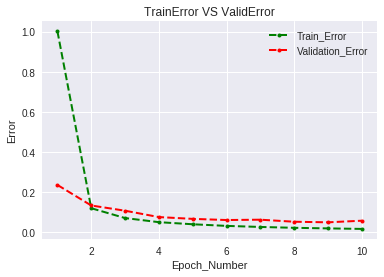

In [41]:
#Plot the train and valid error at end of each epoch

p1=plt.plot(epoch_n, train_l, label="trainloss", color='green', marker='o', linestyle='dashed',linewidth=2, markersize=4)
p2=plt.plot(epoch_n, valid_l, label="valloss", color='red', marker='o', linestyle='dashed',linewidth=2, markersize=4)
plt.xlabel('Epoch_Number')
plt.ylabel('Error')
plt.title('TrainError VS ValidError')
plt.legend((p1[0], p2[0]), ('Train_Error', 'Validation_Error'))
#plt.savefig('TrainerrorVSValerror.png', bbox_inches='tight')
plt.show() 
